In [28]:
# Import các thư viện cần thiết
# pandas
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# numpy
import numpy as np
import os

# matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
# để làm cho kết quả đầu ra của sổ ghi chép này ổn định qua các lần chạy
np.random.seed(42)

In [30]:
# Để vẽ những hình vẽ đẹp
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [31]:
# Lưu số liệu
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [32]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('supermarket_sales.csv')

In [33]:
# hiển thị dữ liệu dưới dạng data frame
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,871-79-9983,B,Mandalay,Normal,Male,Fashion accessories,94.13,5,23.5325,600.0000,2/25/2019,19:39,Credit card,470.65,4.761905,23.5325,4.8
1031,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1032,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
1033,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


In [34]:
# thông tin về file dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1035 non-null   object 
 1   Branch                   1035 non-null   object 
 2   City                     1035 non-null   object 
 3   Customer type            1035 non-null   object 
 4   Gender                   1035 non-null   object 
 5   Product line             1035 non-null   object 
 6   Unit price               1035 non-null   float64
 7   Quantity                 1035 non-null   int64  
 8   Tax 5%                   1035 non-null   float64
 9   Total                    1035 non-null   float64
 10  Date                     1035 non-null   object 
 11  Time                     1035 non-null   object 
 12  Payment                  1035 non-null   object 
 13  cogs                     1035 non-null   float64
 14  gross margin percentage 

In [35]:
print("data analysis")

data analysis


In [36]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [37]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000
mean,55.758145,5.511111,15.419533,331.425617,308.390667,4.761905,15.419533,6.969855
std,26.431496,2.908439,11.656953,246.527424,233.139056,0.000000,11.656953,1.720555
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,33.235000,3.000000,5.966000,127.921500,119.320000,4.761905,5.966000,5.500000
50%,55.390000,5.000000,12.210000,266.028000,244.200000,4.761905,12.210000,7.000000
75%,77.940000,8.000000,22.654250,501.642750,453.085000,4.761905,22.654250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


In [38]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1030    False
1031     True
1032     True
1033     True
1034    False
Length: 1035, dtype: bool

In [39]:
customer_ratings = data['Rating'].mean()
print(round(customer_ratings,2))

6.97


Gender
Female    518
Male      517
Name: count, dtype: int64
Saving figure Number_of_Customers


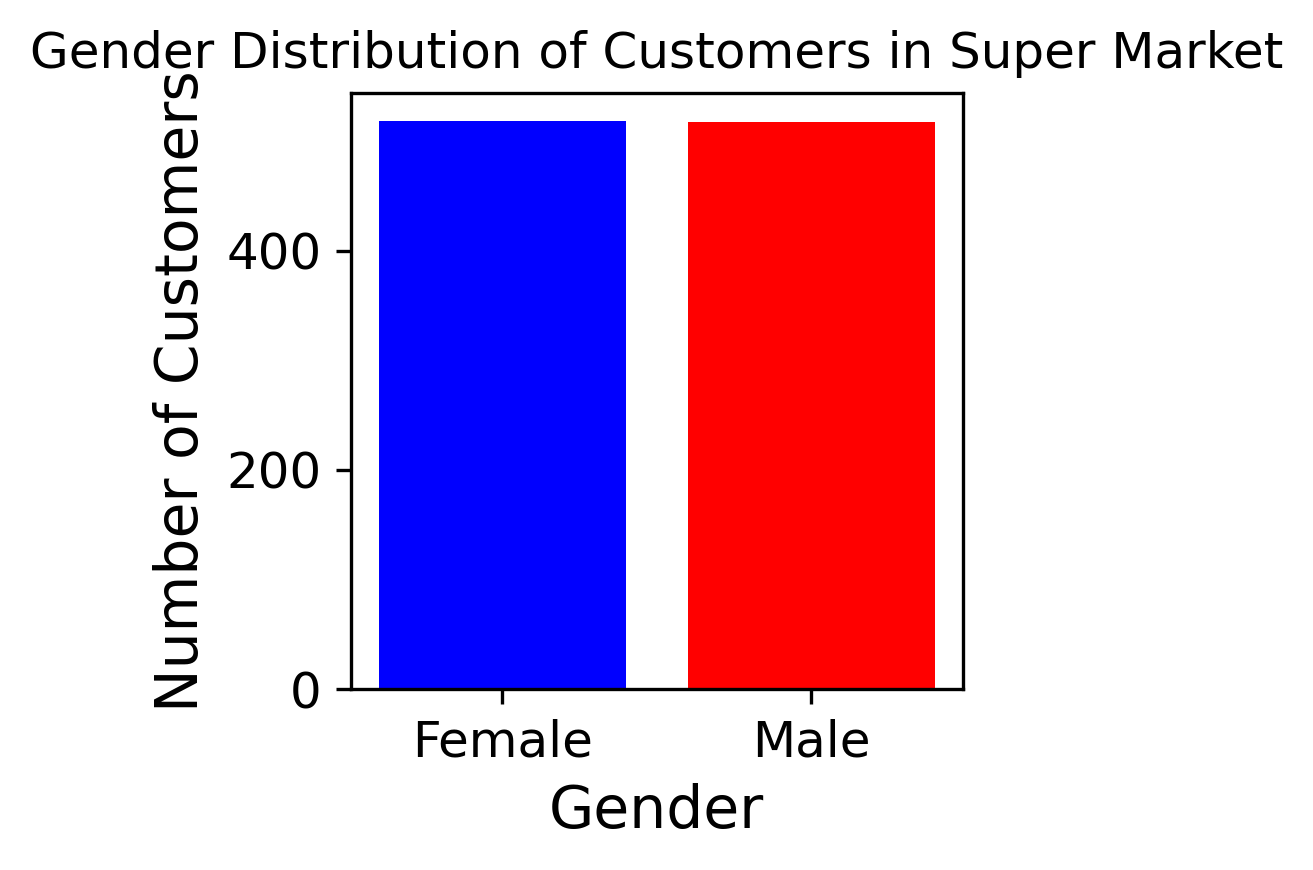

In [40]:
gender_count = data['Gender'].value_counts()
print(gender_count)
plt.figure(figsize=(3,3), dpi = 300)
plt.bar(gender_count.index, gender_count, color=['blue','red'])
plt.title("Gender Distribution of Customers in Super Market")
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
save_fig("Number_of_Customers")
plt.show()

City
Yangon       360
Mandalay     342
Naypyitaw    333
Name: count, dtype: int64
Saving figure Distribution_of_Customers_by_City


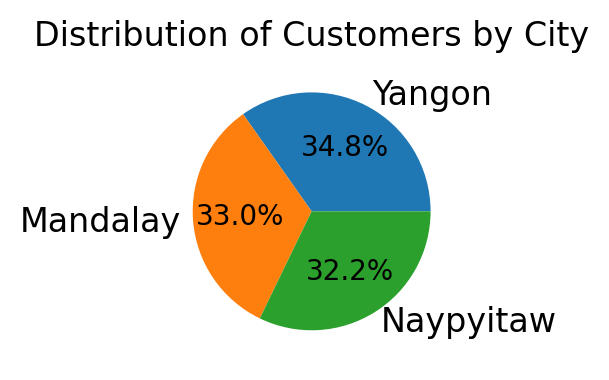

In [41]:
city_counts = data['City'].value_counts()
print(city_counts)

plt.figure(figsize=(4,2), dpi=200)
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Customers by City')
save_fig("Distribution_of_Customers_by_City")
plt.show()

Customer type
Normal    520
Member    515
Name: count, dtype: int64
Saving figure Customer_Type_Distribution


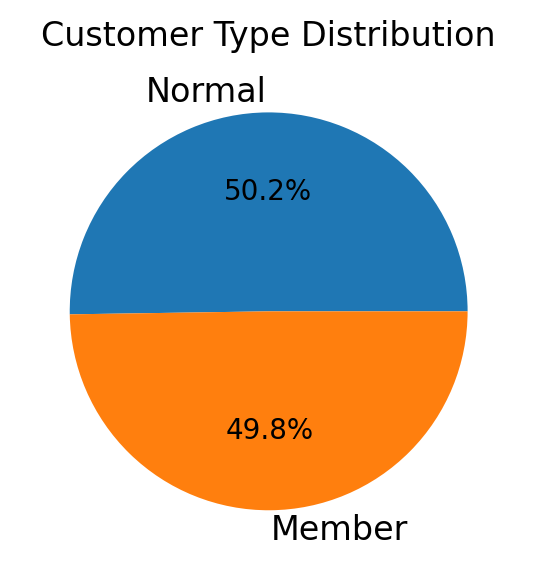

In [42]:
Customer = data['Customer type'].value_counts()
print(Customer)

plt.figure(figsize=(4,3), dpi=200)
plt.pie(Customer, labels=Customer.index, autopct='%1.1f%%')
plt.title('Customer Type Distribution')
save_fig("Customer_Type_Distribution")
plt.show()

In [43]:
productline_count = data['Product line'].value_counts()
print(productline_count)

Product line
Fashion accessories       182
Electronic accessories    178
Food and beverages        178
Sports and travel         170
Home and lifestyle        166
Health and beauty         161
Name: count, dtype: int64


Saving figure Product_Sales_Category_Distribution_in_Super_Market


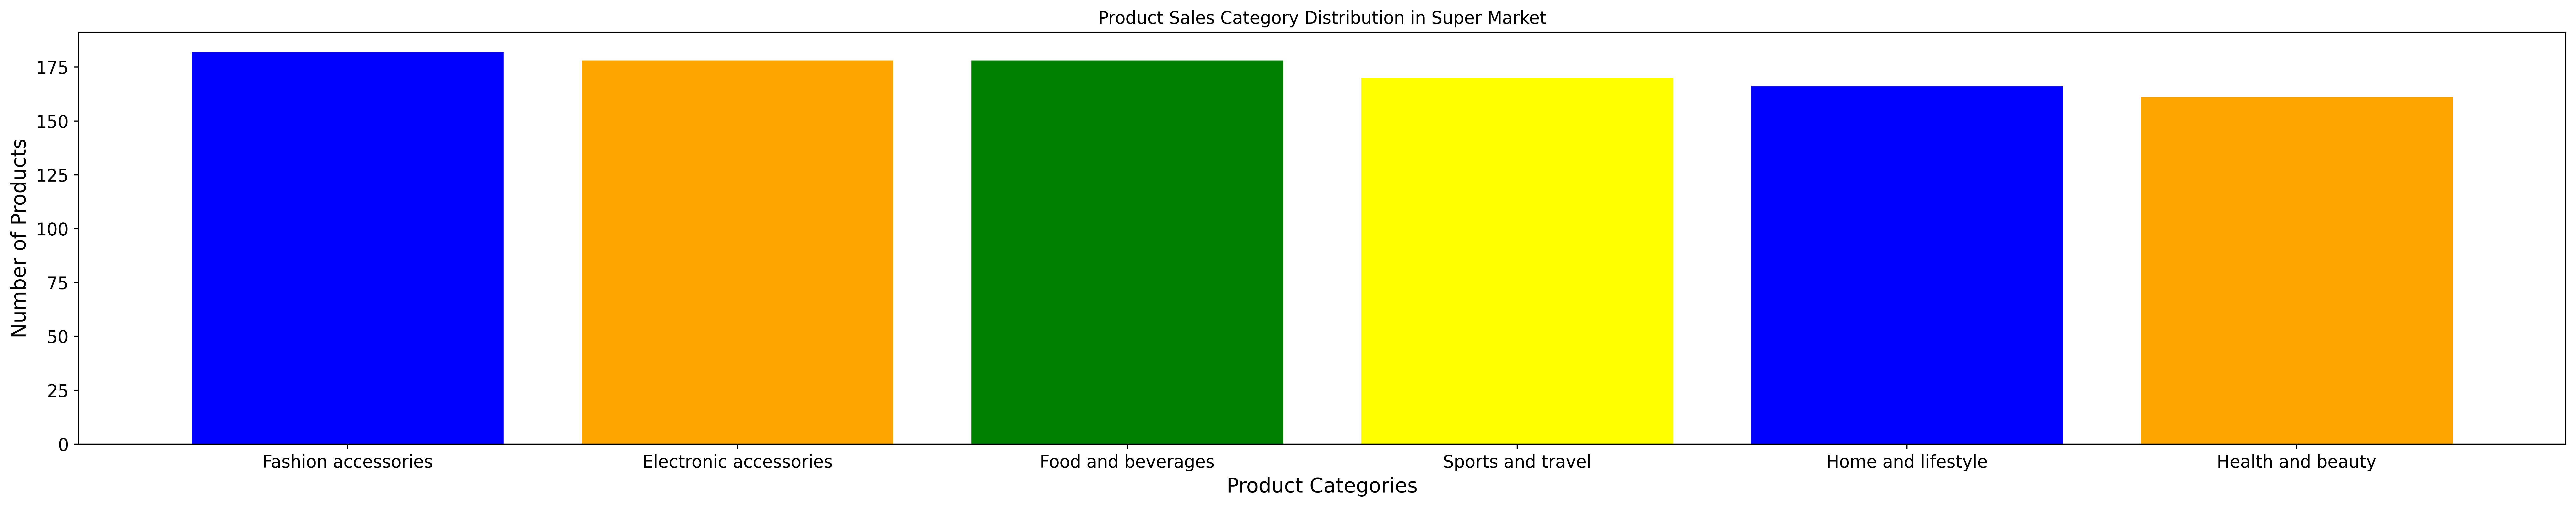

In [44]:
plt.figure(figsize=(25,5), dpi = 400)
plt.bar(productline_count.index, productline_count, color=['blue','orange','green','yellow'])
plt.title("Product Sales Category Distribution in Super Market")
plt.xlabel('Product Categories')
plt.ylabel('Number of Products')
save_fig("Product_Sales_Category_Distribution_in_Super_Market")

plt.show()

In [45]:
import plotly.express as px

In [46]:
ProductRating = data.groupby('Product line')['Rating'].mean().sort_values(ascending=False)

col = {
    'Product' : ProductRating.index,
    'Ratings' : ProductRating.values
}
ProductRating = pd.DataFrame(col)

fig = px.bar(ProductRating, x='Ratings', y='Product', title='Product Line Average Ratings', color="Ratings", orientation='h')
save_fig("Product_Line_Average_Ratings")
fig.show()

Saving figure Product_Line_Average_Ratings


<Figure size 640x480 with 0 Axes>

Saving figure sales_data_plot_Unit_price


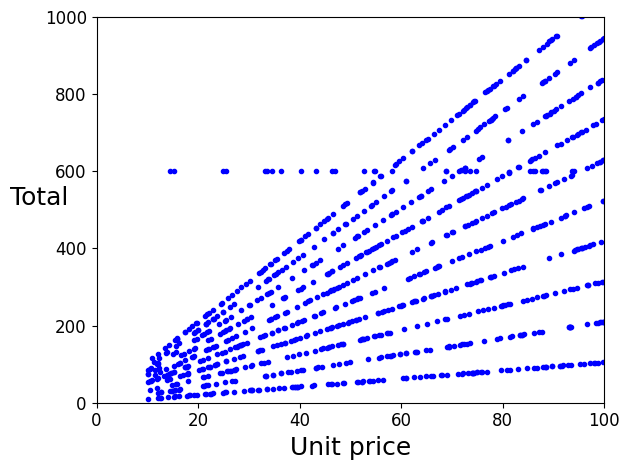

In [47]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['Unit price'], data['Total'], "b.")
plt.xlabel("Unit price", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 100, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("sales_data_plot_Unit_price")
plt.show()

Saving figure sales_data_plot_Quantity_per_total


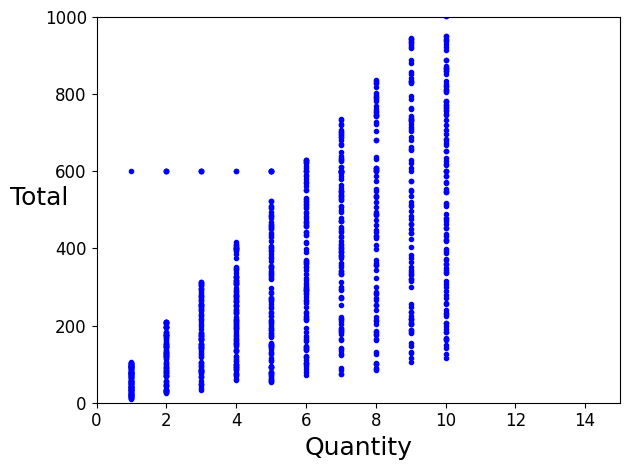

In [48]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['Quantity'], data['Total'], "b.")
plt.xlabel("Quantity", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 15, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("sales_data_plot_Quantity_per_total")
plt.show()


Saving figure tax_vs_total_plot


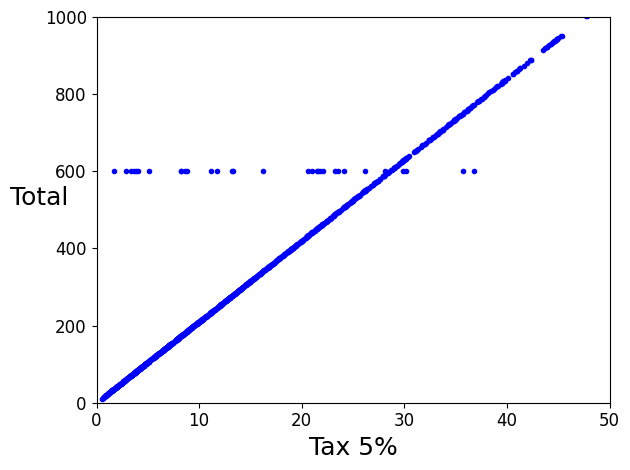

In [49]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['Tax 5%'], data['Total'], "b.")
plt.xlabel("Tax 5%", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 50, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("tax_vs_total_plot")
plt.show()

Saving figure cogs_vs_total_plot


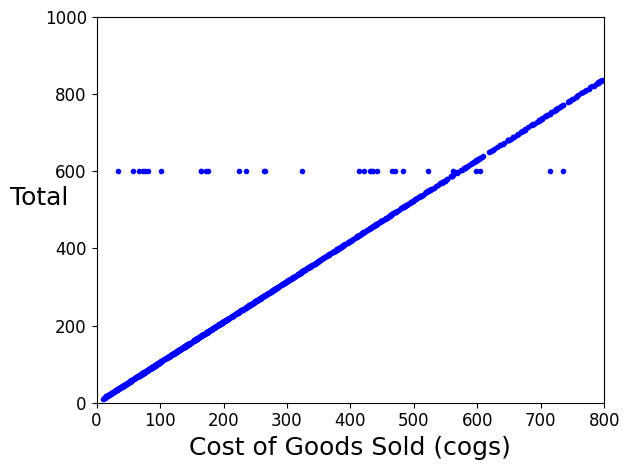

In [50]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['cogs'], data['Total'], "b.")
plt.xlabel("Cost of Goods Sold (cogs)", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 800, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("cogs_vs_total_plot")
plt.show()

Saving figure sales_vs_gross_margin_plot


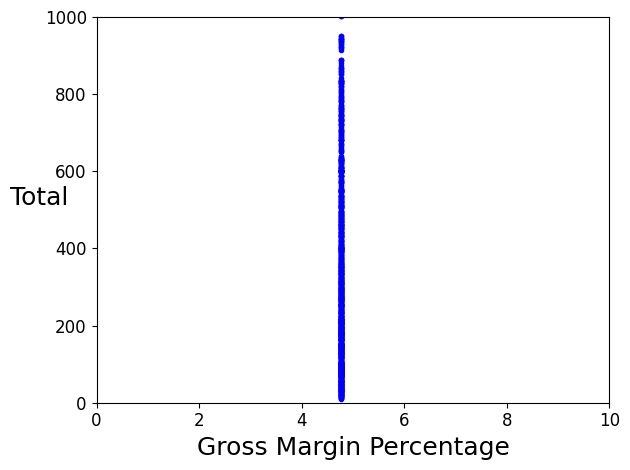

In [51]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['gross margin percentage'], data['Total'], "b.")
plt.xlabel("Gross Margin Percentage", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("sales_vs_gross_margin_plot")
plt.show()

Saving figure gross_income_vs_total_plot


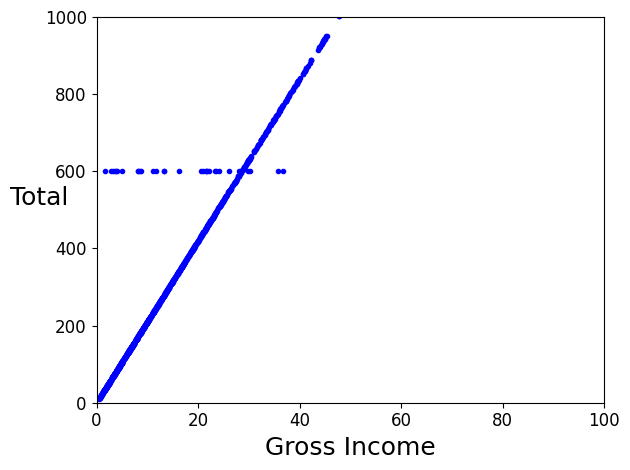

In [52]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['gross income'], data['Total'], "b.")
plt.xlabel("Gross Income", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 100, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("gross_income_vs_total_plot")
plt.show()

Saving figure rating_vs_total_plot


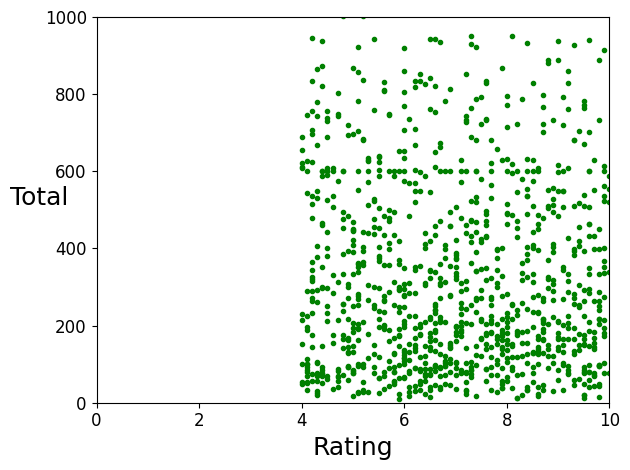

In [53]:
# Tiếp tục với việc trực quan hóa dữ liệu
plt.plot(data['Rating'], data['Total'], "g.")
plt.xlabel("Rating", fontsize=18)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("rating_vs_total_plot")
plt.show()

In [54]:
# đặt Invoice ID là chỉ mục
data.set_index('Invoice ID', inplace=True)

In [55]:
# Kiểm tra và xử lý dữ liệu thiếu (nếu có)
data.dropna(inplace=True)

In [56]:
# hiển thị dữ liệu ở 5 dòng đầu tiên
data.head(5)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Saving figure Total_by_city_plot


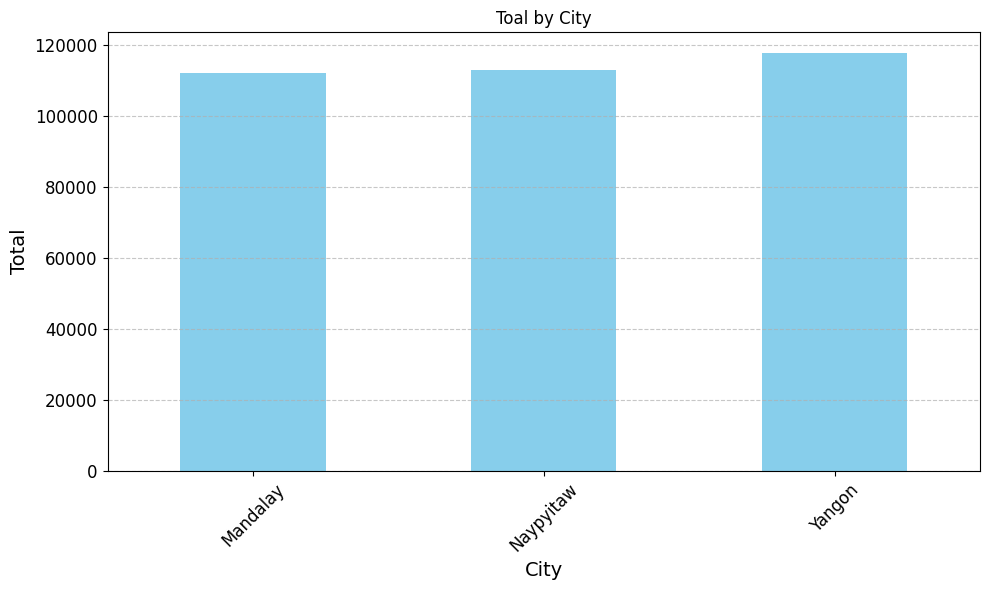

In [57]:
# Trực quan hóa dữ liệu tổng doanh số bán hàng theo thành phố
plt.figure(figsize=(10, 6))
data.groupby('City')['Total'].sum().plot(kind='bar', color='skyblue')
plt.title('Toal by City')
plt.xlabel('City')
plt.ylabel('Total')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
save_fig("Total_by_city_plot")
plt.show()


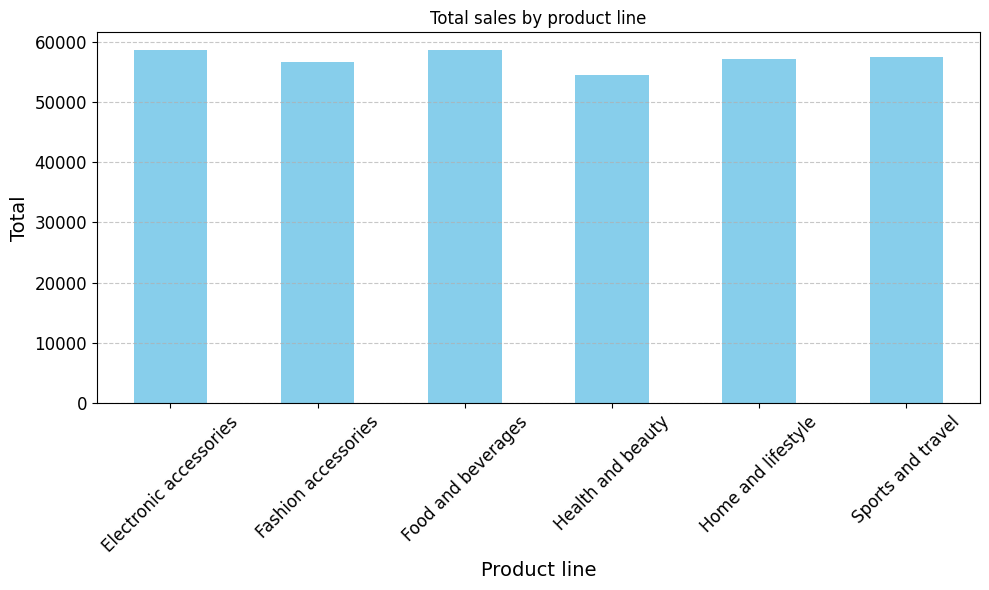

In [58]:
# Trực quan hóa dữ liệu tổng doanh số bán hàng theo dòng sản phẩm
plt.figure(figsize=(10, 6))
data.groupby('Product line')['Total'].sum().plot(kind='bar', color='skyblue')
plt.title('Total sales by product line')
plt.xlabel('Product line')
plt.ylabel('Total')
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [59]:
print("machine learning")

machine learning


In [60]:
# Chia dữ liệu thành features (đặc trưng) và target (mục tiêu)
X = data[['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Rating']]
y = data['Total']

In [61]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# In ra hệ số và chặn của mô hình
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 33.62616451330467
Coefficients: [-0.1763718  -2.51490825  0.05271052  1.05421045  0.          0.05271052
 -0.61408068]


In [64]:
# Tạo dữ liệu mới với 7 đặc trưng để dự đoán
X_new = np.array([[0, 0, 0, 0, 0, 0, 0], [2, 2, 2, 2, 2, 2, 2]])  # Thêm 7 cột đặc trưng với giá trị 0 và 2
y_predict = model.predict(X_new)

c:\Users\Quang Huy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [65]:
# Đánh giá mô hình trên tập kiểm tra
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1586.4722642013053


Saving figure linear_model_predictions_plot


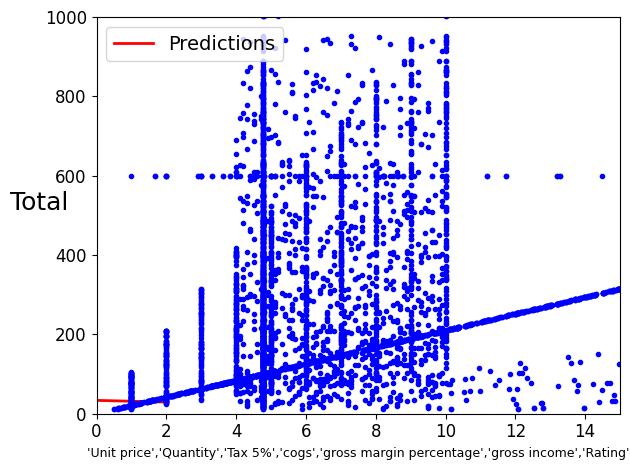

In [83]:
# Trực quan hoá dự đoán
plt.plot(X_new[:, 0], y_predict, "r-", linewidth=2, label="Predictions")  # Chỉ lấy cột đầu tiên của X_new
plt.plot(X, y, "b.")
plt.xlabel("'Unit price','Quantity','Tax 5%','cogs','gross margin percentage','gross income','Rating'", fontsize=9)
plt.ylabel("Total", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 15, 0, 1000])  # Điều chỉnh giới hạn trục để phù hợp với dữ liệu
save_fig("linear_model_predictions_plot")
plt.show()

In [67]:
# Dùng hàm np.linalg.lstsq để tính toán theta_best
X_b = np.c_[np.ones((len(X), 1)), X]  # Thêm x0 = 1 vào mỗi instance
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta_best_svd:", theta_best_svd)

Theta_best_svd: [ 1.20134701 -0.15666598 -2.02528971  0.0526393   1.0527859   5.72070006
  0.0526393  -0.48965864]


In [68]:
# Dùng pseudoinverse để tính toán theta_best
theta_best_pinv = np.linalg.pinv(X_b).dot(y)
print("Theta_best_pinv:", theta_best_pinv)

Theta_best_pinv: [ 1.20134701 -0.15666598 -2.02528971  0.0526393   1.0527859   5.72070006
  0.0526393  -0.48965864]


In [69]:
# Lưu mô hình đã huấn luyện
import joblib
joblib.dump(model, 'sales_prediction_model.pkl')

['sales_prediction_model.pkl']